# **Importing Libraries**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import torch
from datetime import datetime
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# **Load the Dataset**

In [24]:
path = "../data/processed/combined_data.csv"
data = pd.read_csv(path)

print(data.head())

   rolling_mean_12  rolling_std_3  rolling_mean_3  rolling_std_6    lag_10  \
0        -0.440761      -0.332697       -0.414419      -0.447349 -0.367589   
1        -0.440761      -0.332697       -0.414419      -0.447349 -0.367589   
2        -0.440761      -0.415141       -0.451084      -0.447349 -0.367589   
3        -0.440761      -0.415141       -0.487749      -0.447349 -0.465155   
4        -0.440761      -0.415141       -0.487749      -0.447349 -0.465155   

   rolling_mean_6    lag_30  Appliances  
0        -0.42175 -0.367424          60  
1        -0.42175 -0.367424          60  
2        -0.42175 -0.367424          50  
3        -0.42175 -0.367424          50  
4        -0.42175 -0.367424          60  


# **Modeling**

## **Split the Dataset**

# **Baseline Models**

In [25]:
X = data.drop('Appliances', axis=1)
y = data['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train and 20% test

## **Linear Regression**

In [26]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#Making prediction
lr_predictions = lr_model.predict(X_test)

# Evaluating The model
mean_square_error_linear = mean_squared_error(y_test, lr_predictions)
mean_absolute_error_linear = mean_absolute_error(y_test, lr_predictions)
r2_score_linear = r2_score(y_test, lr_predictions)

print("Mean Square Error:", mean_square_error_linear)
print("Mean Absolute Error:", mean_absolute_error_linear)
print("R2 Score:", r2_score_linear)

Mean Square Error: 1774.307237541553
Mean Absolute Error: 19.405960800130856
R2 Score: 0.8226950048856546


## **Random Forest Regression**

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluating The model
mean_square_error_rf = mean_squared_error(y_test, y_pred_rf)
mean_absolute_error_rf = mean_absolute_error(y_test, y_pred_rf)
r2_score_rf = r2_score(y_test, y_pred_rf)

print("Mean Square Error:", mean_square_error_rf)
print("Mean Absolute Error:", mean_absolute_error_rf)
print("R2 Score:", r2_score_rf)

Mean Square Error: 1287.8279204590858
Mean Absolute Error: 12.832636082180947
R2 Score: 0.8713084643325374


## **Gradient Boosting Regressor**

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# Evaluating the model
mean_absolute_error_gbr = mean_absolute_error(y_test, y_pred_gbr)
mean_square_error_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Mean Absolute Error:", mean_absolute_error_gbr)
print("Mean Square Error:", mean_square_error_gbr)
print("R2 Score:", r2_gbr)

Mean Absolute Error: 16.152424927954655
Mean Square Error: 1364.4653292659273
R2 Score: 0.8636501540317235


# **Deep Learning Models**

## **LSTM Model**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

X_train_seq = np.expand_dims(X_train, axis=1)
X_test_seq = np.expand_dims(X_test, axis=1)

lstm_model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

# Model Compiling
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Preventing Overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training model
history_lstm = lstm_model.fit(X_train_seq, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping], verbose=1)

# Evaluate the moedl
y_pred_lstm = lstm_model.predict(X_test_seq).flatten()
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

print("Mean Absolute Error:", mae_lstm)
print("Root Mean Squared Error:", mse_lstm)
print("R2 Score:", r2_lstm)

Epoch 1/100


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


445/445 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 17504.8555 - mse: 17504.8555 - val_loss: 7455.1597 - val_mse: 7455.1597
Epoch 2/100
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7196.1201 - mse: 7196.1201 - val_loss: 3574.8752 - val_mse: 3574.8752
Epoch 3/100
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3772.0945 - mse: 3772.0945 - val_loss: 1930.6744 - val_mse: 1930.6744
Epoch 4/100
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2510.7554 - mse: 2510.7554 - val_loss: 1500.8264 - val_mse: 1500.8264
Epoch 5/100
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1932.2916 - mse: 1932.2916 - val_loss: 1336.2128 - val_mse: 1336.2128
Epoch 6/100
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1982.7205 - mse: 1982.7205 - val_loss: 1227.3120 - val_mse: 1227.3120
Epoch 7/100
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1758.0352 - mse: 1758.0352 - val_loss: 1156.7175 - val_mse: 1156.7175
Epoch 8/100
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1630.9735 - mse: 1630.9735 - val

## **GRU Model**

In [30]:
from tensorflow.keras.layers import GRU

X_train_gru = np.expand_dims(X_train, axis=1)
X_test_gru = np.expand_dims(X_test, axis=1)

gru = Sequential([
    GRU(64, activation='tanh', return_sequences=True, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2])),
    Dropout(0.2),
    GRU(32, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compiling the model
gru.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Early stopping for GRU
early_stopping_gru = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history_gru = gru.fit(X_train_gru, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping_gru],
    verbose=1)


y_pred_gru = gru.predict(X_test_gru).flatten()
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
r2_gru = r2_score(y_test, y_pred_gru)

print("Mean Absolute Error:", mae_gru)
print("Root Mean Squared Error:", mse_gru)
print("R2 Score:", r2_gru)

Epoch 1/100


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 18349.3770 - mse: 18349.3770 - val_loss: 8331.4004 - val_mse: 8331.4004
Epoch 2/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7695.1953 - mse: 7695.1953 - val_loss: 3993.5376 - val_mse: 3993.5376
Epoch 3/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3877.1287 - mse: 3877.1287 - val_loss: 2359.2263 - val_mse: 2359.2263
Epoch 4/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2577.9941 - mse: 2577.9941 - val_loss: 1760.3916 - val_mse: 1760.3916
Epoch 5/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2261.9634 - mse: 2261.9634 - val_loss: 1523.9910 - val_mse: 1523.9910
Epoch 6/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1979.0966 - mse: 1979.0966 - val_loss: 1365.8344 - val_mse: 1365.8344
Epoch 7/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1912.4595 - mse: 1912.4595 - val_loss: 1241.9093 - val_mse: 1241.9093
Epoch 8/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1803.5756 - mse: 1803.5756 - val

## **CNN-LSTM Hybrid**

In [31]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

X_train_cnn_lstm = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn_lstm = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

cnn_lstm = Sequential([
    Conv1D(64, kernel_size=1, activation='relu', input_shape=(X_train_cnn_lstm.shape[1], X_train_cnn_lstm.shape[2])),
    MaxPooling1D(pool_size=1),
    LSTM(64),
    Dropout(0.2),
    Dense(1)
])

# Compiling the model
cnn_lstm.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Early stopping
early_stopping_cnn_lstm = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_cnn_lstm = cnn_lstm.fit(X_train_cnn_lstm, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Evaluating the model
y_pred_cnn_lstm = cnn_lstm.predict(X_test_cnn_lstm).flatten()
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

print("Mean Absolute Error:", mae_cnn_lstm)
print("Root Mean Squared Error:", mse_cnn_lstm)
print("R2 Score:", r2_cnn_lstm)

Epoch 1/100


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


445/445 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 17707.6777 - mse: 17707.6777 - val_loss: 13102.2871 - val_mse: 13102.2871
Epoch 2/100
445/445 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 13346.9941 - mse: 13346.9941 - val_loss: 11056.6572 - val_mse: 11056.6572
Epoch 3/100
445/445 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 12089.3018 - mse: 12089.3018 - val_loss: 10131.8223 - val_mse: 10131.8223
Epoch 4/100
445/445 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 10519.1846 - mse: 10519.1846 - val_loss: 9782.6963 - val_mse: 9782.6963
Epoch 5/100
445/445 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 10101.5908 - mse: 10101.5908 - val_loss: 8142.4507 - val_mse: 8142.4507
Epoch 6/100
445/445 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8610.2588 - mse: 8610.2588 - val_loss: 7210.2583 - val_mse: 7210.2583
Epoch 7/100
445/445 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7401.5986 - mse: 7401.5986 - val_loss: 6434.2363 - val_mse: 6434.2363
Epoch 8/100
445/445 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6937.5400 - mse: 6

In [32]:
# Metrices of above all models in single dataframe

metrics_data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'LSTM', 'GRU', 'CNN-LSTM'],
    'Mean Squared Error': [mean_square_error_linear, mean_square_error_rf, mean_square_error_gbr, mse_lstm, mse_gru, mse_cnn_lstm],
    'Mean Absolute Error': [mean_absolute_error_linear, mean_absolute_error_rf, mean_absolute_error_gbr, mae_lstm, mae_gru, mae_cnn_lstm],
    'R2 Score': [r2_score_linear, r2_score_rf, r2_gbr, r2_lstm, r2_gru, r2_cnn_lstm]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df


,Model,Mean Squared Error,Mean Absolute Error,R2 Score
0,Linear Regression,1774.307238,19.405961,0.822695
1,Random Forest,1287.827920,12.832636,0.871308
2,Gradient Boosting,1364.465329,16.152425,0.863650
3,LSTM,1072.631104,13.215910,0.892813
4,GRU,1080.935913,13.186028,0.891983
5,CNN-LSTM,1282.944336,13.186628,0.871796


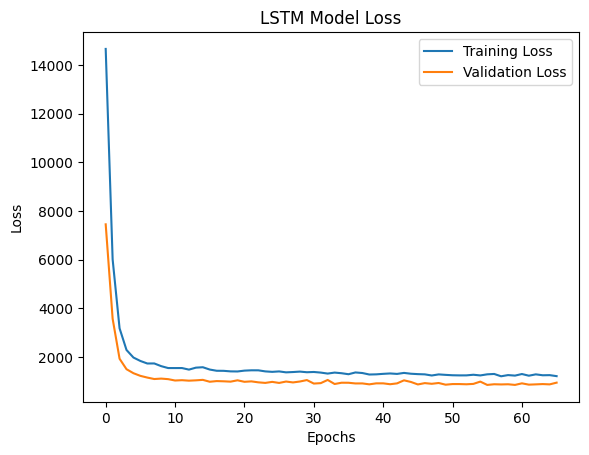

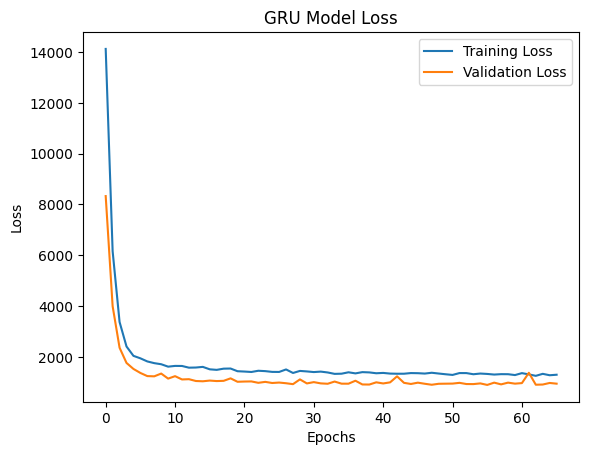

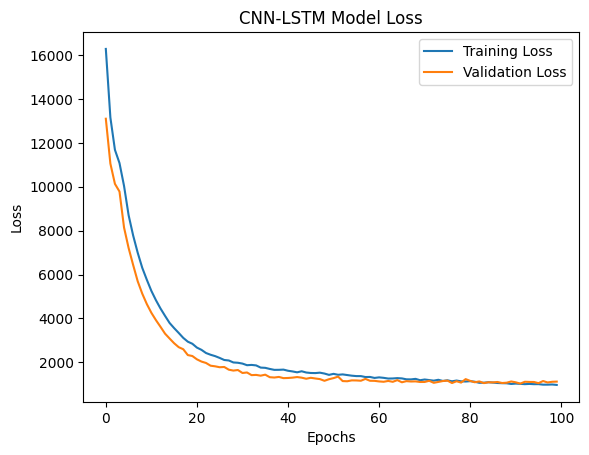

In [33]:
# Plot training history

# LSTM
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# GRU
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# CNN-LSTM Model
plt.plot(history_cnn_lstm.history['loss'], label='Training Loss')
plt.plot(history_cnn_lstm.history['val_loss'], label='Validation Loss')
plt.title('CNN-LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

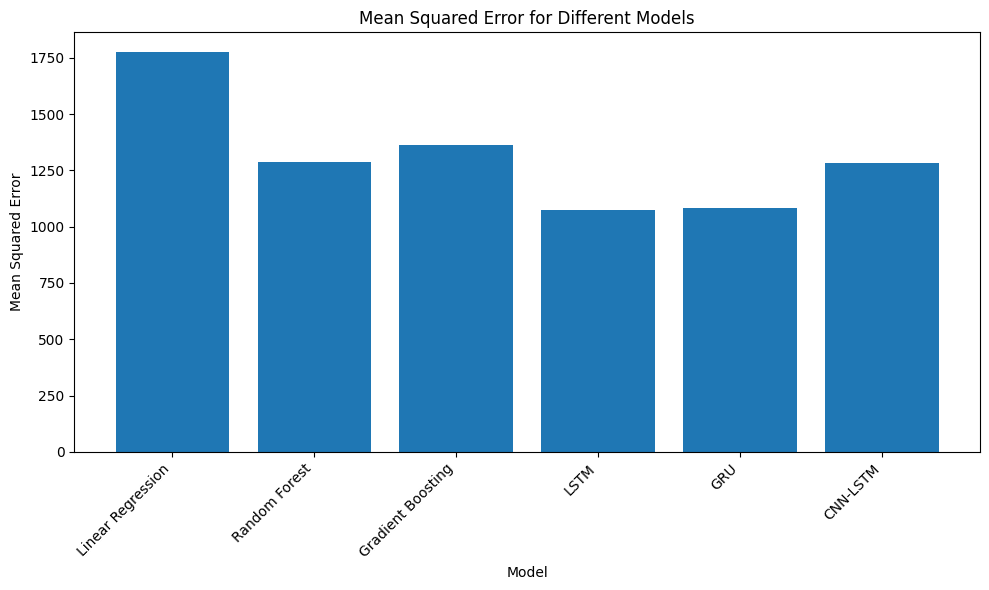

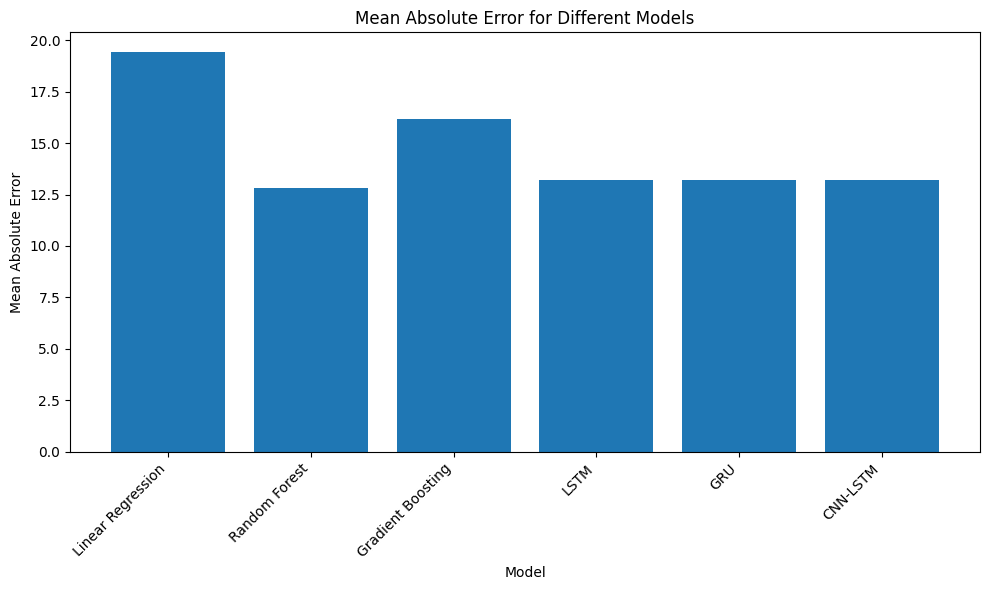

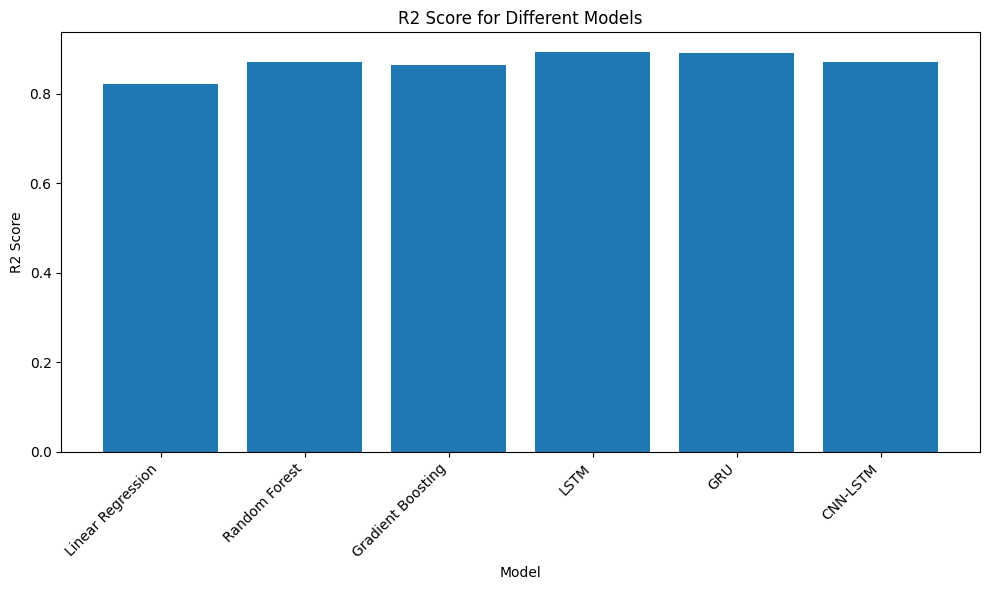

In [34]:
# Plotting evaluation metrics separately

metrics = ['Mean Squared Error', 'Mean Absolute Error', 'R2 Score']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(metrics_df['Model'], metrics_df[metric])
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

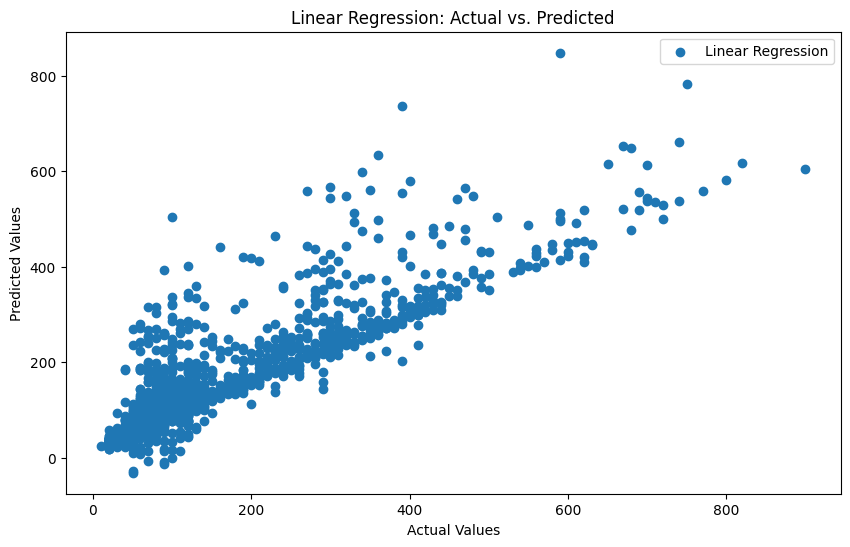

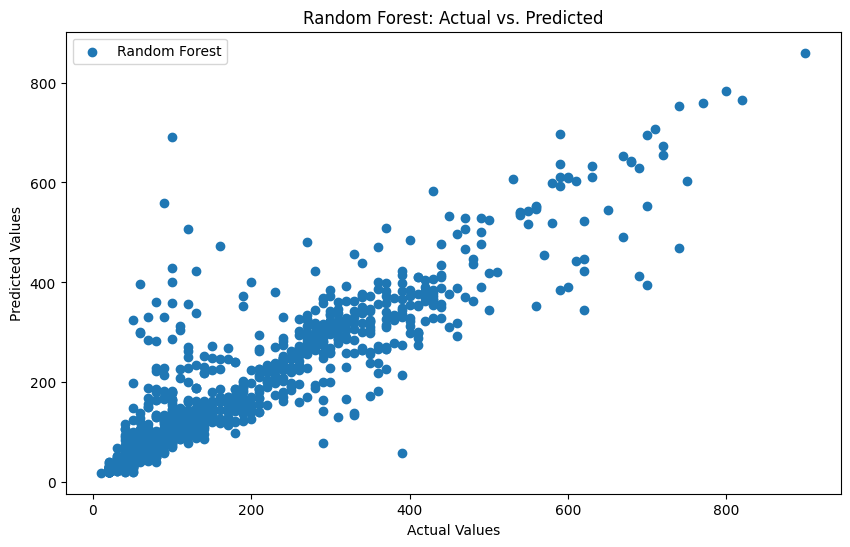

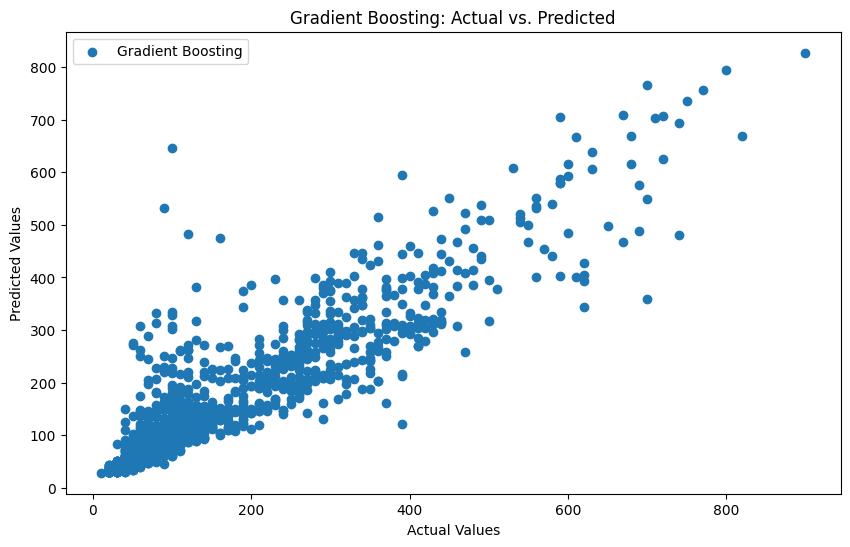

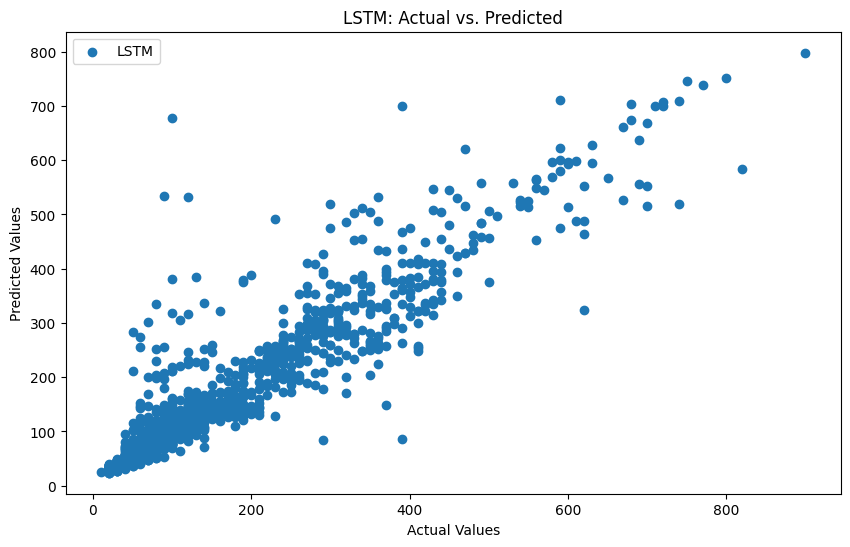

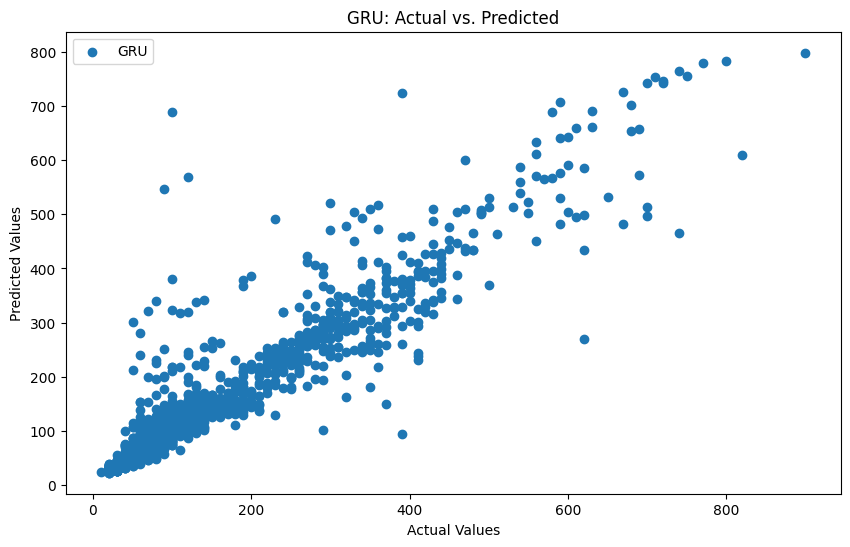

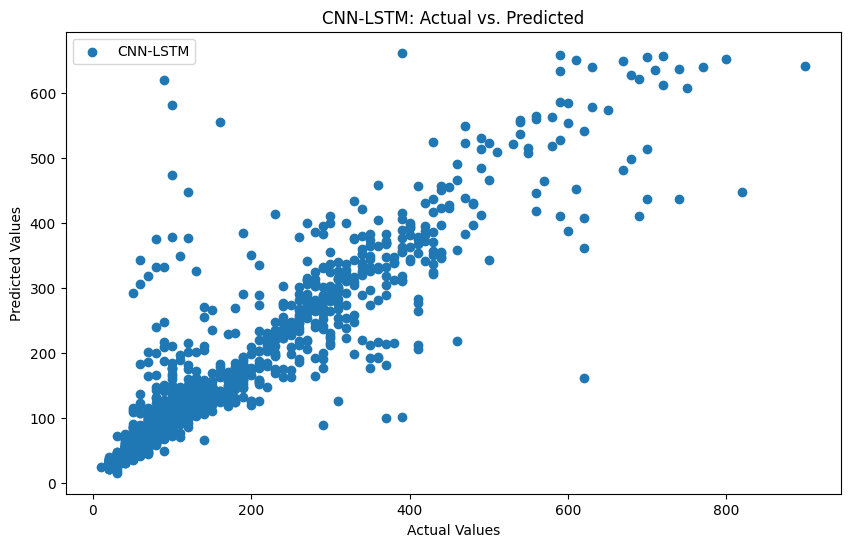

In [35]:
# Plotting predicted vs. actual values for each model

plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions, label='Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, label='Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs. Predicted')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, label='Gradient Boosting')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting: Actual vs. Predicted')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lstm, label='LSTM')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('LSTM: Actual vs. Predicted')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gru, label='GRU')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('GRU: Actual vs. Predicted')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_cnn_lstm, label='CNN-LSTM')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('CNN-LSTM: Actual vs. Predicted')
plt.legend()
plt.show()

In [36]:
# Create a dictionary of results
results = {
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "MAE": [mean_absolute_error_linear, mean_absolute_error_rf, mean_absolute_error_gbr],
    "MSE": [mean_square_error_linear, mean_square_error_rf, mean_square_error_gbr],
    "R2": [r2_score_linear, r2_score_rf, r2_gbr]
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Rank the models (lower is better for MAE and MSE, higher is better for R2)
results_df["MAE Rank"] = results_df["MAE"].rank()
results_df["MSE Rank"] = results_df["MSE"].rank()
results_df["R2 Rank"] = results_df["R2"].rank(ascending=False)

# Calculate average rank
results_df["Average Rank"] = results_df[["MAE Rank", "MSE Rank", "R2 Rank"]].mean(axis=1)

# Find the best model
best_model_row = results_df.loc[results_df["Average Rank"].idxmin()]

print("Model Comparison:")
print(results_df)
print("\nBest Baseline Model Based on Average Rank:")
print(best_model_row["Model"])


Model Comparison:
               Model        MAE          MSE        R2  MAE Rank  MSE Rank  \
0  Linear Regression  19.405961  1774.307238  0.822695       3.0       3.0   
1      Random Forest  12.832636  1287.827920  0.871308       1.0       1.0   
2  Gradient Boosting  16.152425  1364.465329  0.863650       2.0       2.0   

   R2 Rank  Average Rank  
0      3.0           3.0  
1      1.0           1.0  
2      2.0           2.0  

Best Baseline Model Based on Average Rank:
Random Forest


In [37]:
# Deep learning model results
dl_results = {
    "Model": ["LSTM", "GRU", "CNN_LSTM"],
    "MAE": [mae_lstm, mae_gru, mae_cnn_lstm],
    "MSE": [mse_lstm, mse_gru, mse_cnn_lstm],
    "R2": [r2_lstm, r2_gru, r2_cnn_lstm]
}

# Create DataFrame
dl_results_df = pd.DataFrame(dl_results)

# Ranking: lower is better for MAE and RMSE, higher is better for R2
dl_results_df["MAE Rank"] = dl_results_df["MAE"].rank()
dl_results_df["MSE Rank"] = dl_results_df["MSE"].rank()
dl_results_df["R2 Rank"] = dl_results_df["R2"].rank(ascending=False)

# Average rank to determine the best overall
dl_results_df["Average Rank"] = dl_results_df[["MAE Rank", "MSE Rank", "R2 Rank"]].mean(axis=1)

# Get the best model
best_dl_model_row = dl_results_df.loc[dl_results_df["Average Rank"].idxmin()]

print("Deep Learning Model Comparison:")
print(dl_results_df)
print("\nBest Deep Learning Model Based on Average Rank:")
print(best_dl_model_row["Model"])


Deep Learning Model Comparison:
      Model        MAE          MSE        R2  MAE Rank  MSE Rank  R2 Rank  \
0      LSTM  13.215910  1072.631104  0.892813       3.0       1.0      1.0   
1       GRU  13.186028  1080.935913  0.891983       1.0       2.0      2.0   
2  CNN_LSTM  13.186628  1282.944336  0.871796       2.0       3.0      3.0   

   Average Rank  
0      1.666667  
1      1.666667  
2      2.666667  

Best Deep Learning Model Based on Average Rank:
LSTM


## **Optimization**

### Hyperparameter Technique

In [38]:
from tensorflow.keras.optimizers import Adam

def create_lstm_model(input_shape, dropout_rate=0.2, units_1=64, units_2=32, dense_units=16, learning_rate=0.001):
    """
    Creates and compiles an LSTM model for regression tasks.

    Parameters:
    - input_shape (tuple): Shape of the input data (timesteps, features)
    - dropout_rate (float): Dropout rate for regularization
    - units_1 (int): Number of units in the first LSTM layer
    - units_2 (int): Number of units in the second LSTM layer
    - dense_units (int): Number of units in the dense hidden layer

    Returns:
    - model (Sequential): Compiled LSTM model
    """
    model = Sequential([
        LSTM(units_1, activation='tanh', return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
        Dropout(dropout_rate),
        LSTM(units_2, activation='tanh', return_sequences=False),
        Dropout(dropout_rate),
        Dense(dense_units, activation='relu'),
        Dense(1)  # Output layer for regression
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mse'])

    return model

In [39]:
import itertools

# Define parameter grid
param_grid = {
    'units_1': [64, 128],
    'units_2': [32, 64],
    'dense_units': [16],
    'dropout_rate': [0.2],
    'learning_rate': [0.001],
    'epochs': [10, 20],
    'batch_size': [32],
}

# Generate all combinations
keys, values = zip(*param_grid.items())
combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

# Track best model
best_mse = float('inf')
best_model = None
best_params = {}
results = []

for combo in combinations:
    print(f"Training with: {combo}")

    # Create model using your function
    model = create_lstm_model(
        input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
        units_1=combo['units_1'],
        units_2=combo['units_2'],  # optional tweak: second layer smaller
        dropout_rate=combo['dropout_rate'],
        learning_rate=combo['learning_rate']
    )

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train
    history = model.fit(
        X_train_seq, y_train,
        validation_split=0.2,
        epochs=combo['epochs'],
        batch_size=combo['batch_size'],
        callbacks=[early_stopping],
        verbose=0
    )

    # Predict and evaluate
    y_pred = model.predict(X_test_seq).flatten()
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        **combo,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    })

    # Track the best model
    if mse < best_mse:
        best_mse = mse
        best_model = model
        best_params = combo
        print(f"New Best MSE: {mse:.4f} with params: {combo}")

# Final result summary
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='MSE')
print("\nTop 5 Hyperparameter Results:")
print(results_df.head())

print("\nBest Parameters:")
print(best_params)

Training with: {'units_1': 64, 'units_2': 32, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 10, 'batch_size': 32}


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
New Best MSE: 1246.0122 with params: {'units_1': 64, 'units_2': 32, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 10, 'batch_size': 32}
Training with: {'units_1': 64, 'units_2': 32, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 20, 'batch_size': 32}


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
New Best MSE: 1112.6066 with params: {'units_1': 64, 'units_2': 32, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 20, 'batch_size': 32}
Training with: {'units_1': 64, 'units_2': 64, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 10, 'batch_size': 32}


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training with: {'units_1': 64, 'units_2': 64, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 20, 'batch_size': 32}


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training with: {'units_1': 128, 'units_2': 32, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 10, 'batch_size': 32}


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training with: {'units_1': 128, 'units_2': 32, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 20, 'batch_size': 32}


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training with: {'units_1': 128, 'units_2': 64, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 10, 'batch_size': 32}


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training with: {'units_1': 128, 'units_2': 64, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 20, 'batch_size': 32}


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Top 5 Hyperparameter Results:
   units_1  units_2  dense_units  dropout_rate  learning_rate  epochs  \
1       64       32           16           0.2          0.001      20   
5      128       32           16           0.2          0.001      20   
3       64       64           16           0.2          0.001      20   
7      128       64           16           0.2          0.001      20   
2       64       64           16           0.2          0.001      10   

   batch_size          MSE        MAE        R2  
1          32  1112.606567  14.089587  0.888818  
5          32  1123.282959  13.540903  0.887751  
3          32  1145.207642  13.768641  0.885560  
7          32  1160.065918  14.002050  0.884076  
2          32  1193.456299  14.436079  0.880739  

Best Parameters:
{'units_1': 64, 'units_2': 32, 'dense_units': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'epochs': 20, 'batch_size': 32}


### Early Stopping Technique

In [40]:
# Adding early stopping and training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

finalized_history = best_model.fit(
    X_train_seq, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1426.2083 - mse: 1426.2083 - val_loss: 943.6772 - val_mse: 943.6772
Epoch 2/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1453.8147 - mse: 1453.8147 - val_loss: 950.7068 - val_mse: 950.7068
Epoch 3/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1373.2854 - mse: 1373.2854 - val_loss: 938.0436 - val_mse: 938.0436
Epoch 4/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1374.2900 - mse: 1374.2900 - val_loss: 939.7278 - val_mse: 939.7278
Epoch 5/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1387.8053 - mse: 1387.8053 - val_loss: 927.1902 - val_mse: 927.1902
Epoch 6/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1390.5706 - mse: 1390.5706 - val_loss: 917.7063 - val_mse: 917.7063
Epoch 7/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1375.9431 - mse: 1375.9431 - val_loss: 926.5005 - val_mse: 926.5005
Epoch 8/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1390.7565 - mse: 1390.7565 - val_loss: 947.2

In [41]:
# Predict on the test set using the best_model
y_pred_final = best_model.predict(X_test_seq).flatten()

# Evaluate the final model
mse_final = mean_squared_error(y_test, y_pred_final)
mae_final = mean_absolute_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print("Final Model Evaluation:")
print(f"Mean Squared Error: {mse_final}")
print(f"Mean Absolute Error: {mae_final}")
print(f"R-squared: {r2_final}")

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step
Final Model Evaluation:
Mean Squared Error: 1114.2596435546875
Mean Absolute Error: 13.482702255249023
R-squared: 0.8886529803276062


### Comparison between, Before and After Optimizing the LSTM model

In [42]:
print("\nComparison with Original Model:")
print(f"Original Model - MSE: {mse_lstm}")
print(f"Original Model - MAE: {mae_lstm}")
print(f"Original Model - R-square: {r2_lstm}")

print(f"\nOptimized Model - MSE: {mse_final}")
print(f"Optimized Model - MAE: {mae_final}")
print(f"Original Model - R-square: {r2_final}")

# Compare MSE, MAE and R2
print(f"\n\nOptimized Model Improvement (MSE): {mse_lstm-mse_final}")
print(f"Optimized Model Improvement (MAE): {mae_lstm-mae_final}")
print(f"Optimized Model Improvement (R2): {r2_lstm-r2_final}")


Comparison with Original Model:
Original Model - MSE: 1072.631103515625
Original Model - MAE: 13.215909957885742
Original Model - R-square: 0.8928129076957703

Optimized Model - MSE: 1114.2596435546875
Optimized Model - MAE: 13.482702255249023
Original Model - R-square: 0.8886529803276062


Optimized Model Improvement (MSE): -41.6285400390625
Optimized Model Improvement (MAE): -0.26679229736328125
Optimized Model Improvement (R2): 0.0041599273681640625


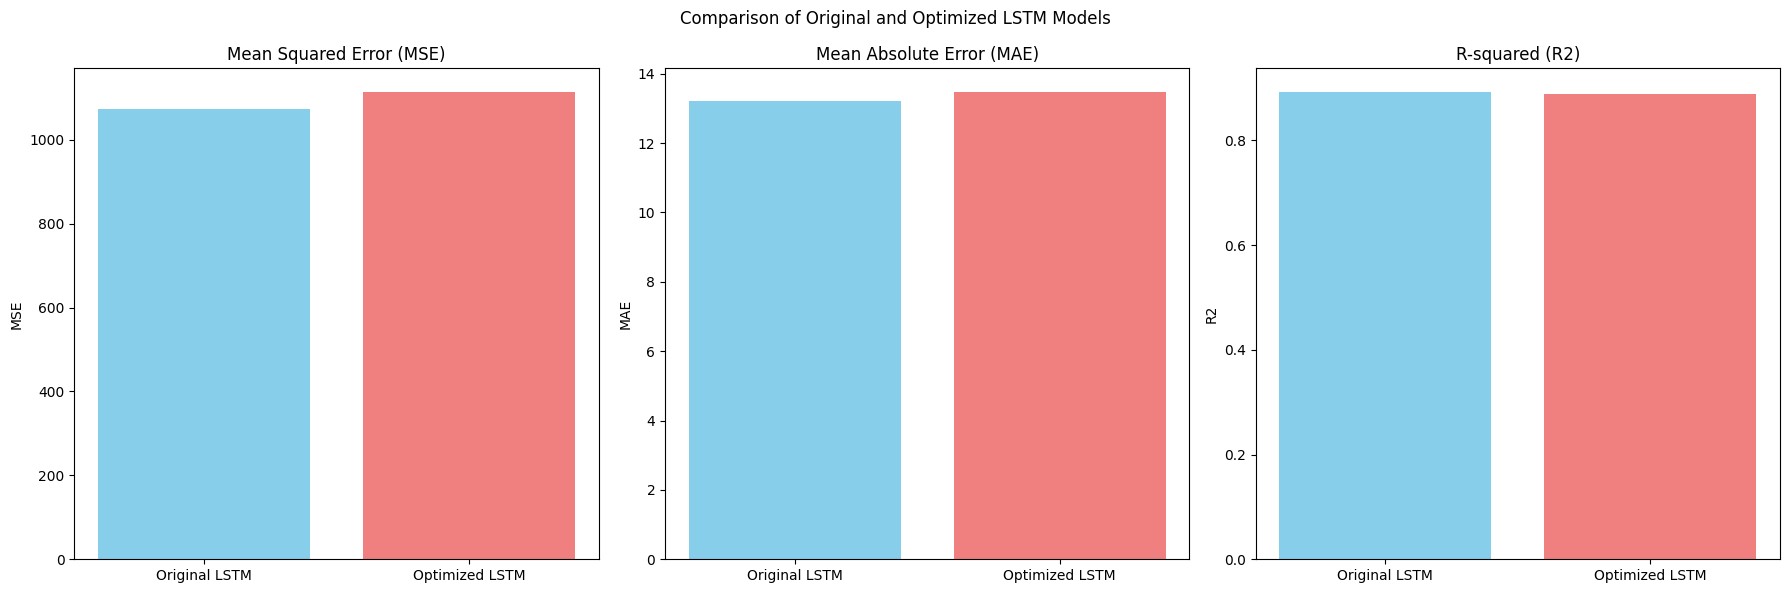

In [43]:
# Visualize the Comparison of original and optimized model of lstm

# Data for the bar graph
models = ['Original LSTM', 'Optimized LSTM']
mse_values = [mse_lstm, mse_final]
mae_values = [mae_lstm, mae_final]
r2_values = [r2_lstm, r2_final]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot MSE
axes[0].bar(models, mse_values, color=['skyblue', 'lightcoral'])
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_ylabel('MSE')

# Plot MAE
axes[1].bar(models, mae_values, color=['skyblue', 'lightcoral'])
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].set_ylabel('MAE')

# Plot R-squared
axes[2].bar(models, r2_values, color=['skyblue', 'lightcoral'])
axes[2].set_title('R-squared (R2)')
axes[2].set_ylabel('R2')


# Add labels and title
plt.suptitle('Comparison of Original and Optimized LSTM Models')
plt.tight_layout()

# Show the plot
plt.show()

# **Save all models**

In [44]:
import joblib
import os
import h5py

# Define the target directory
target_dir = "../models/"

# Make sure the directory exists
os.makedirs(target_dir, exist_ok=True)

# Save traditional ML models
joblib.dump(lr_model, os.path.join(target_dir, 'linear_regression_model.pkl'))
joblib.dump(rf_model, os.path.join(target_dir, 'random_forest_model.pkl'))
joblib.dump(gbr, os.path.join(target_dir, 'gradient_booster_regressor_model.pkl'))

# Save deep learning models
lstm_model.save(os.path.join(target_dir, 'lstm_model.keras'))
gru.save(os.path.join(target_dir, 'gru_model.keras'))
cnn_lstm.save(os.path.join(target_dir, 'cnn_lstm_model.keras'))
lstm_model.save(os.path.join(target_dir, "lstm_model_h5.h5"))

# Save best optimized model
joblib.dump(best_model, os.path.join(target_dir, 'optimized_model.pkl'))

['../models/optimized_model.pkl']